# Decision Trees Fundamentals

In this notebook, we'll explore Decision Trees, a versatile machine learning algorithm that can be used for both classification and regression tasks. Decision trees make predictions by learning simple decision rules inferred from the data features.

We'll cover:
1. Understanding Decision Tree structure and components
2. Implementing a Decision Tree from scratch
3. Training and making predictions
4. Visualizing decision boundaries
5. Comparing with scikit-learn's implementation

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import sys
import os

# Get the absolute path of the directory the notebook is in
notebook_dir = os.path.dirname(os.path.abspath(__file__)) if '__file__' in locals() else os.getcwd()
# Get the parent directory (your project root)
project_root = os.path.dirname(notebook_dir)

# Add the project root to the Python path if it's not already there
if project_root not in sys.path:
    sys.path.append(project_root)
    print(f"Added project root to sys.path: {project_root}") # Optional: for verification

# Import custom modules
from models.decision_tree import DecisionTree
from utils.data_generator import generate_nonlinear_data
from utils.plotting import plot_decision_boundary

# Set random seed for reproducibility
np.random.seed(42)

## 1. Generate Synthetic Data

We'll create a synthetic dataset with a non-linear decision boundary to demonstrate the capabilities of decision trees.

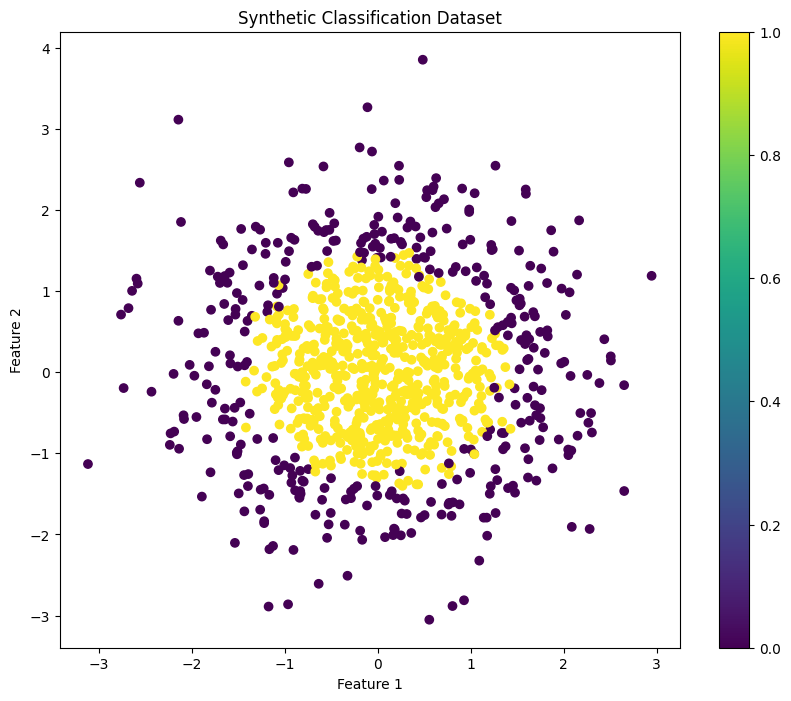

In [8]:
# Generate synthetic data
X, y = generate_nonlinear_data(n_samples=1000, noise=0.1, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Plot the data
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.colorbar()
plt.title('Synthetic Classification Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## 2. Train Our Custom Decision Tree

Now we'll train our custom decision tree implementation on the synthetic data.

In [9]:
# Create and train our custom decision tree
dt = DecisionTree(max_depth=5)
dt.fit(X_train, y_train)

# Make predictions
y_pred = dt.predict(X_test)

# Calculate accuracy
accuracy = np.mean(y_pred == y_test)
print(f'Test accuracy: {accuracy:.4f}')

Test accuracy: 0.9400


## 3. Visualize Decision Boundary

Let's visualize the decision boundary learned by our custom decision tree.

<Axes: title={'center': 'Custom Decision Tree Decision Boundary'}, xlabel='Feature 1', ylabel='Feature 2'>

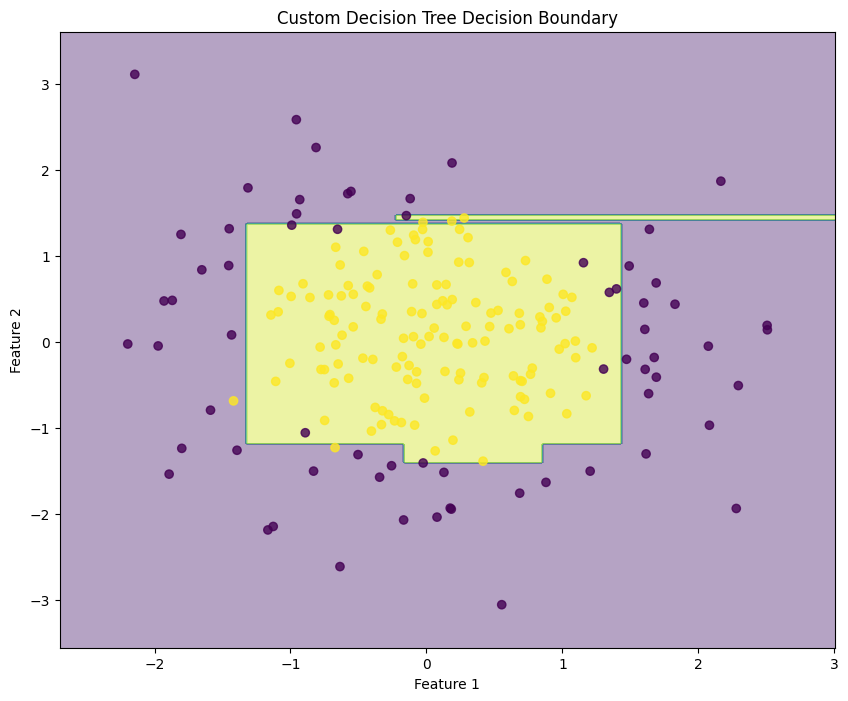

In [10]:
# Plot decision boundary for our custom implementation
plot_decision_boundary(X_test, y_test, dt, title='Custom Decision Tree Decision Boundary')

## 4. Compare with Scikit-learn

Let's compare our implementation with scikit-learn's decision tree classifier.

Scikit-learn Decision Tree accuracy: 0.9400


<Axes: title={'center': 'Scikit-learn Decision Tree Decision Boundary'}, xlabel='Feature 1', ylabel='Feature 2'>

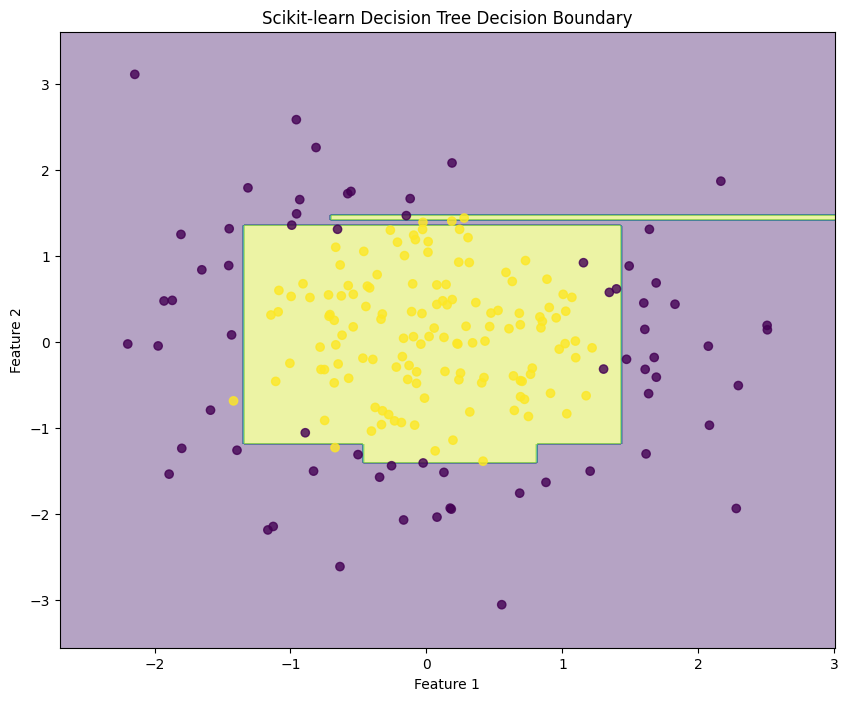

In [11]:
# Create and train scikit-learn's decision tree
sklearn_dt = DecisionTreeClassifier(max_depth=5, random_state=42)
sklearn_dt.fit(X_train, y_train)

# Make predictions
sklearn_y_pred = sklearn_dt.predict(X_test)

# Calculate accuracy
sklearn_accuracy = np.mean(sklearn_y_pred == y_test)
print(f'Scikit-learn Decision Tree accuracy: {sklearn_accuracy:.4f}')

# Plot decision boundary
plot_decision_boundary(X_test, y_test, sklearn_dt, title='Scikit-learn Decision Tree Decision Boundary')

## 5. Effect of Tree Depth

Let's explore how the maximum depth of the tree affects its performance and decision boundary.

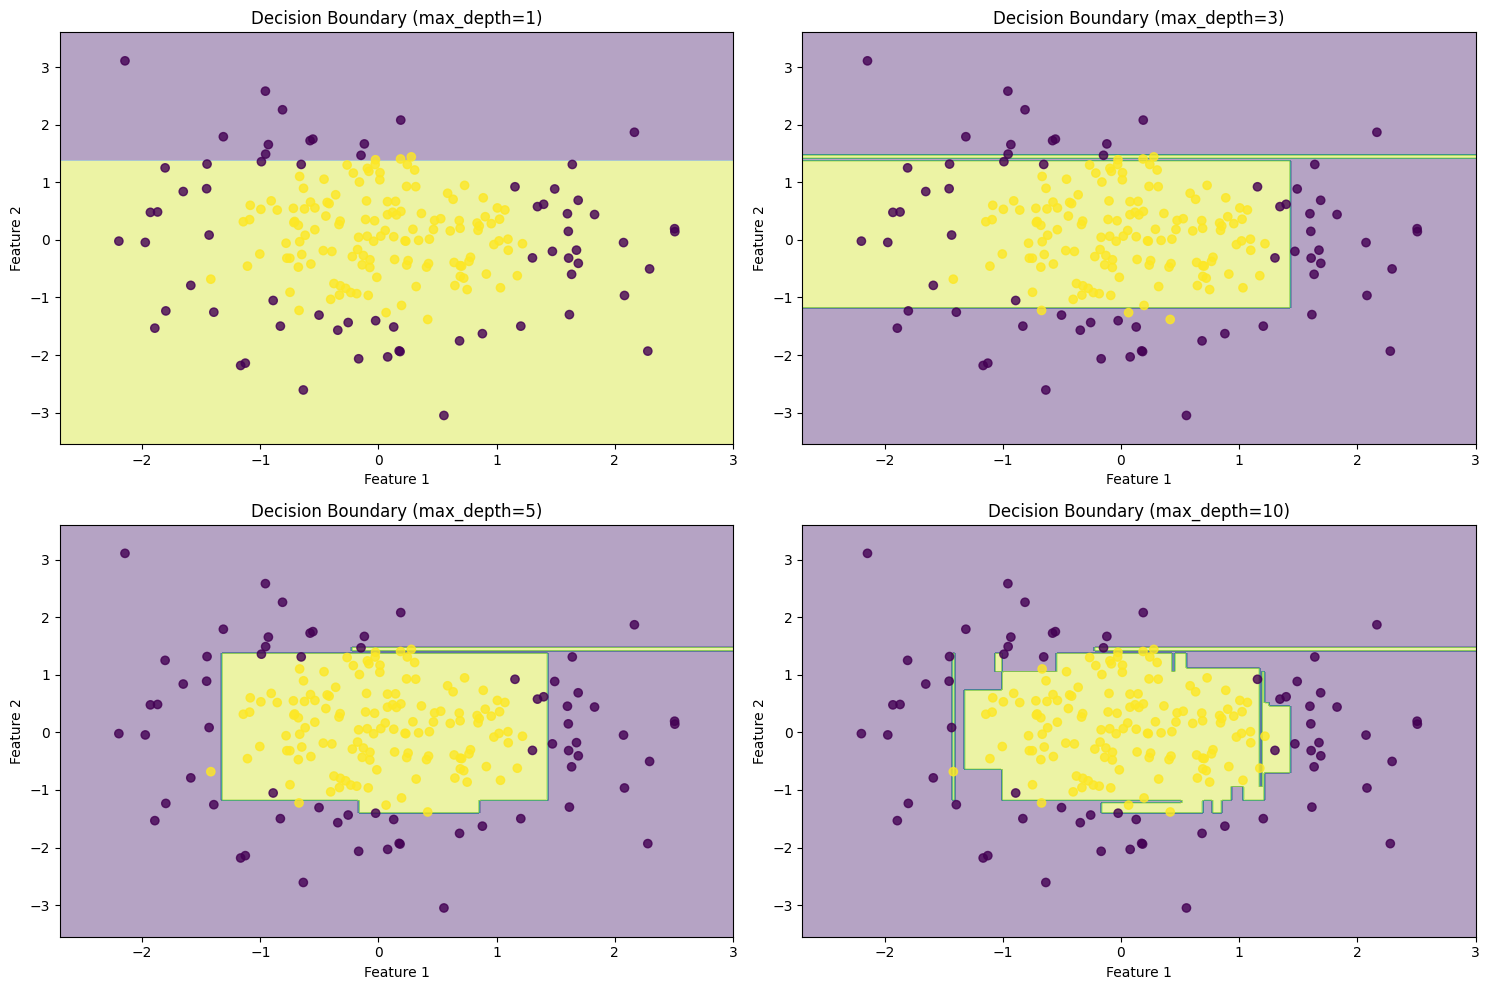

In [12]:
depths = [1, 3, 5, 10]
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()  # Flatten the 2x2 array of axes

for i, depth in enumerate(depths):
    # Train decision tree with different max_depth
    dt = DecisionTree(max_depth=depth)
    dt.fit(X_train, y_train)
    
    # Plot decision boundary
    plot_decision_boundary(X_test, y_test, dt, 
                         title=f'Decision Boundary (max_depth={depth})',
                         ax=axes[i])

plt.tight_layout()
plt.show()

## Conclusion

In this notebook, we've explored decision trees by:
1. Implementing a decision tree classifier from scratch
2. Training it on synthetic data
3. Visualizing its decision boundaries
4. Comparing it with scikit-learn's implementation
5. Analyzing the effect of tree depth on model performance

Key takeaways:
- Decision trees create rectangular decision boundaries
- Increasing tree depth leads to more complex decision boundaries
- Too much depth can lead to overfitting
- Our implementation performs similarly to scikit-learn's 